# Smoothing particles

In [7]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_clustering as plt_cp  # type: ignore
import smoothing_particles as sp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [8]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2024-10-24"

n_particles = 2
ordering = True
video_name = "2n_0m_2f_230330_1"
save_figures = True
x_bounds = [0, 1050]
y_bounds = [70, 1850]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [9]:
df_tracked = pd.read_csv("{}/clustered_{}.csv".format(output_path, video_name), low_memory=False)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,1587.350058,59.069803,1591.994323,61.088797,NaN,1587.350058,59.069803,NaN,1587.350058,59.069803,1.473471,8610.0,200.105358,100.426831,0.864943,2,NaN,NaN,NaN,NaN,False,False,False
1,1,0,1151.582078,92.427967,1131.428705,96.533509,NaN,1151.582078,92.427967,NaN,1151.582078,92.427967,-1.507389,15132.0,218.170865,102.730520,0.882202,2,NaN,NaN,NaN,NaN,False,False,False


## Swapping mixed IDs

In [62]:
omega_threshold = 30 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 93  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 3000 , 93, omega_threshold, True],
    [3000 , 6000 , 93, omega_threshold, True],
    [6000 , 9000 , 93, omega_threshold, True],
    [9000 , 12000, 93, omega_threshold, True],
    [12000, 15000, 93, omega_threshold, True],
    [15000, 18000, 93, omega_threshold, True],
    [18000, 21000, 93, omega_threshold, True],
    [21000, 22440, 93, omega_threshold, True],
    [22440, 22560, 70, omega_threshold, False],
    [22560, 24000, 93, omega_threshold, True],
    [24000, 27000, 93, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 93 
	- Angle: 29.999999999999996 



100%|███████████████████████| 11/11 [00:05<00:00,  1.97it/s]


Time: 3000 Chunks 2 Allowed time 3000 Permutation [0 1]
Time: 6000 Chunks 2 Allowed time 6000 Permutation [0 1]
Time: 9000 Chunks 2 Allowed time 9000 Permutation [0 1]
Time: 12000 Chunks 2 Allowed time 12000 Permutation [0 1]
Time: 15000 Chunks 2 Allowed time 15000 Permutation [0 1]
Time: 18000 Chunks 2 Allowed time 18000 Permutation [0 1]
Time: 21000 Chunks 2 Allowed time 21000 Permutation [0 1]
Time: 22440 Chunks 2 Allowed time 22440 Permutation [0 1]
Time: 22560 Chunks 2 Allowed time 22560 Permutation [0 1]
Time: 24000 Chunks 2 Allowed time 24000 Permutation [0 1]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_03000,0,0,1587.350058,59.069803,1591.994323,61.088797,NaN,1587.350058,59.069803,NaN,1587.350058,59.069803,1.473471,1.473471,8610.0,200.105358,100.426831,0.864943,2,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_03000,1,1,1151.582078,92.427967,1131.428705,96.533509,NaN,1151.582078,92.427967,NaN,1151.582078,92.427967,-1.507389,-1.507389,15132.0,218.170865,102.730520,0.882202,2,NaN,NaN,NaN,NaN,False,False,False
2,True,3,chunk_00000_03000,0,0,1605.103082,58.309940,1606.545424,59.647669,NaN,1605.103082,58.309940,NaN,1605.103082,58.309940,1.546517,1.546517,10060.0,253.475047,100.983349,0.917214,2,3.0,5.917674,-0.253287,0.024349,False,False,False
3,True,3,chunk_00000_03000,1,1,1151.530021,92.132771,1130.579179,95.497801,NaN,1151.530021,92.132771,NaN,1151.530021,92.132771,1.512559,-1.512559,15056.0,218.216262,101.859622,0.884372,2,3.0,-0.017352,-0.098399,0.001723,False,False,False
4,True,6,chunk_00000_03000,0,0,1605.049035,58.351204,1606.372251,59.703837,NaN,1605.049035,58.351204,NaN,1605.049035,58.351204,1.544728,1.544728,10054.0,252.874530,100.975396,0.916816,2,3.0,-0.018015,0.013754,-0.000596,False,False,False
5,True,6,chunk_00000_03000,1,1,1151.461809,92.142146,1130.617767,95.524449,NaN,1151.461809,92.142146,NaN,1151.461809,92.142146,1.512465,-1.512465,15069.0,218.088915,101.887909,0.884159,2,3.0,-0.022737,0.003125,-0.000032,False,False,False
6,True,9,chunk_00000_03000,0,0,1587.456126,58.808045,1592.524307,60.549077,NaN,1587.456126,58.808045,NaN,1587.456126,58.808045,1.484579,1.484579,8627.0,200.042149,101.397298,0.862017,2,3.0,-5.864303,0.152280,-0.020050,False,False,False
7,True,9,chunk_00000_03000,1,1,1151.761936,92.514324,1132.501253,97.381025,NaN,1151.761936,92.514324,NaN,1151.761936,92.514324,1.524522,-1.524522,15080.0,215.252903,102.802224,0.878584,2,3.0,0.100042,0.124059,0.004019,False,False,False


## Interpolation over not allowed frames

In [63]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:,"permuted_id"]==df_full["permuted_id"].unique()[id_]
        df_full[mask]=df_full[mask].interpolate(method="linear")

In [64]:
if ordering:
    cols = [
        "id", "permuted_id", "time", "position_x", "position_y", "weighted_x", "weighted_y",
        "darkest_v", "darkest_x", "darkest_y", "lightest_v", "lightest_x", "lightest_y",
        "orientation", "corrected_orientation", "area", "axis_major", "axis_minor", "eccentricity"
    ]
    df_temp = df_full[cols]
    df_temp.to_csv("{}/interpolated_{}.csv".format(output_path, video_name), index=False)
    df_temp

Thresholds:
	- Velocity: 8.489788664084896 
	- Angle: 27.664059842040636 



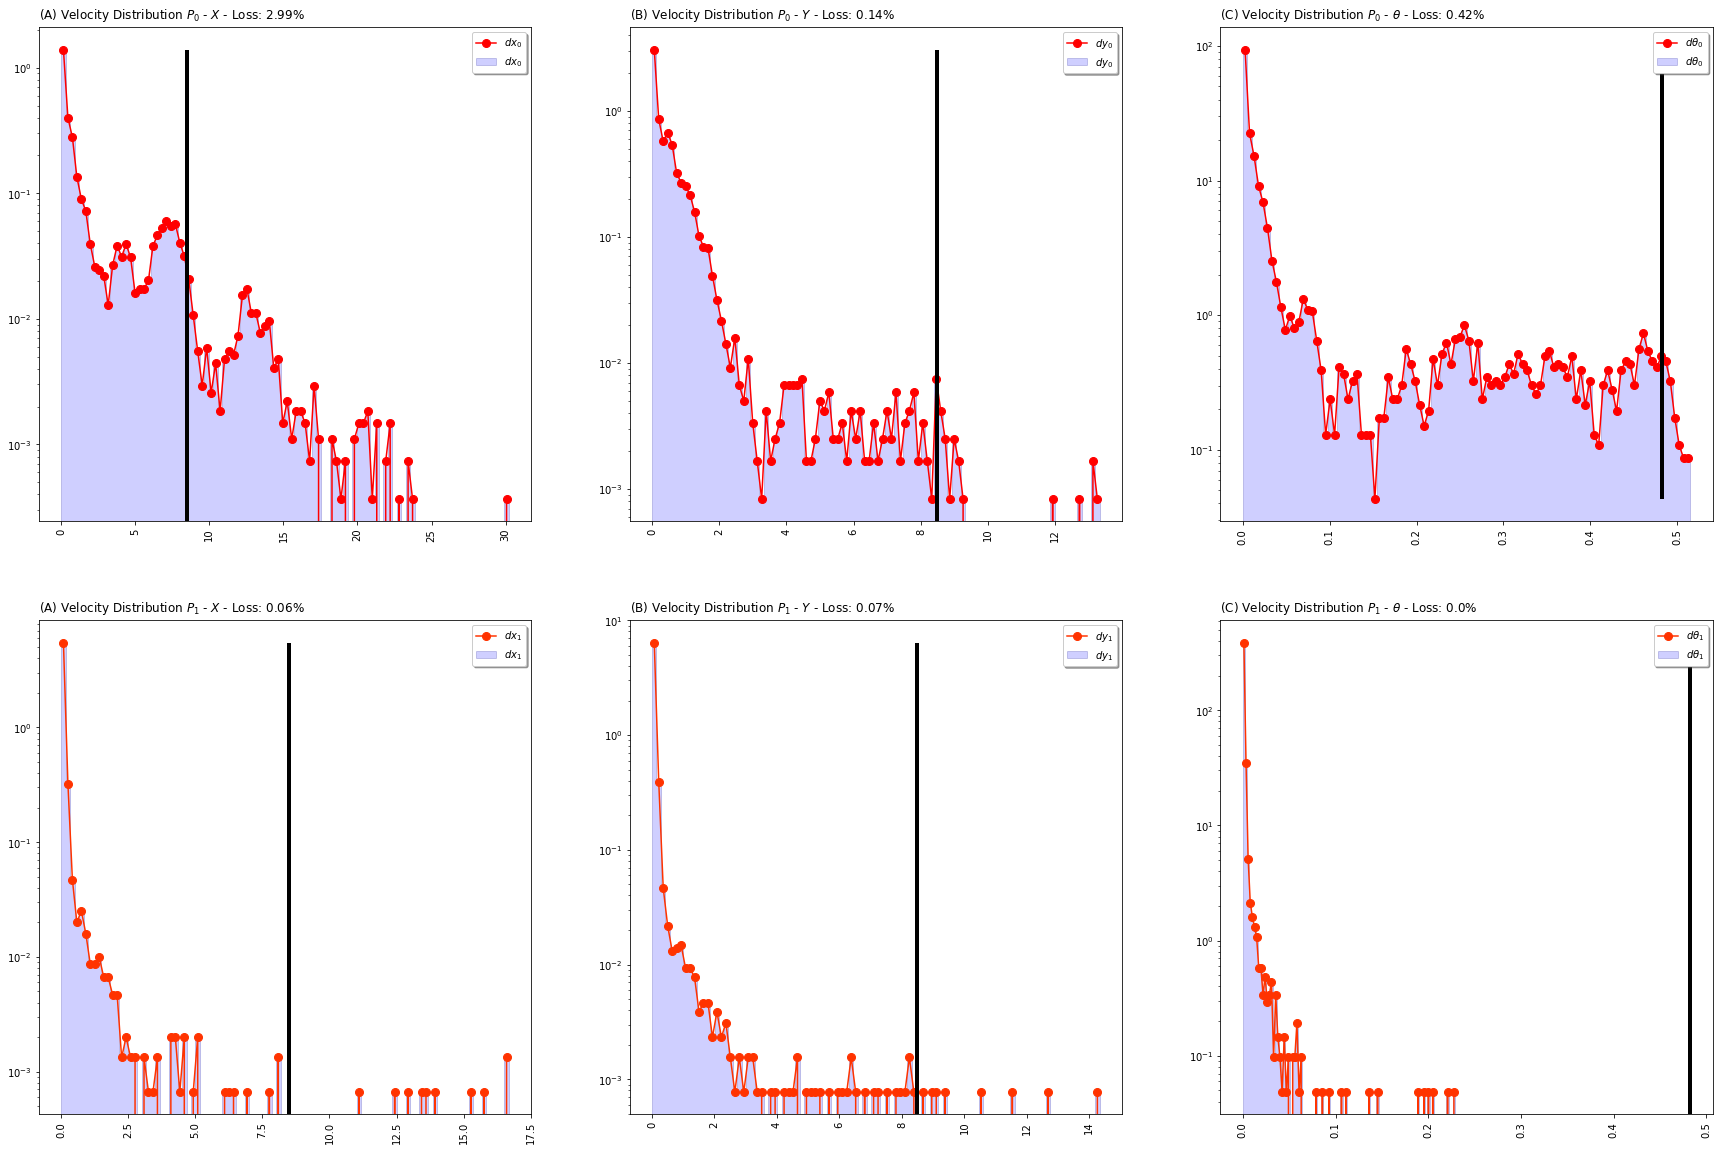

In [65]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = df_full["velocity_orientation"].abs().quantile(0.9965) # Angular velocity per frame
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9701) # Velocity per frame limited with half average size of particle
    print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend
    )

Original


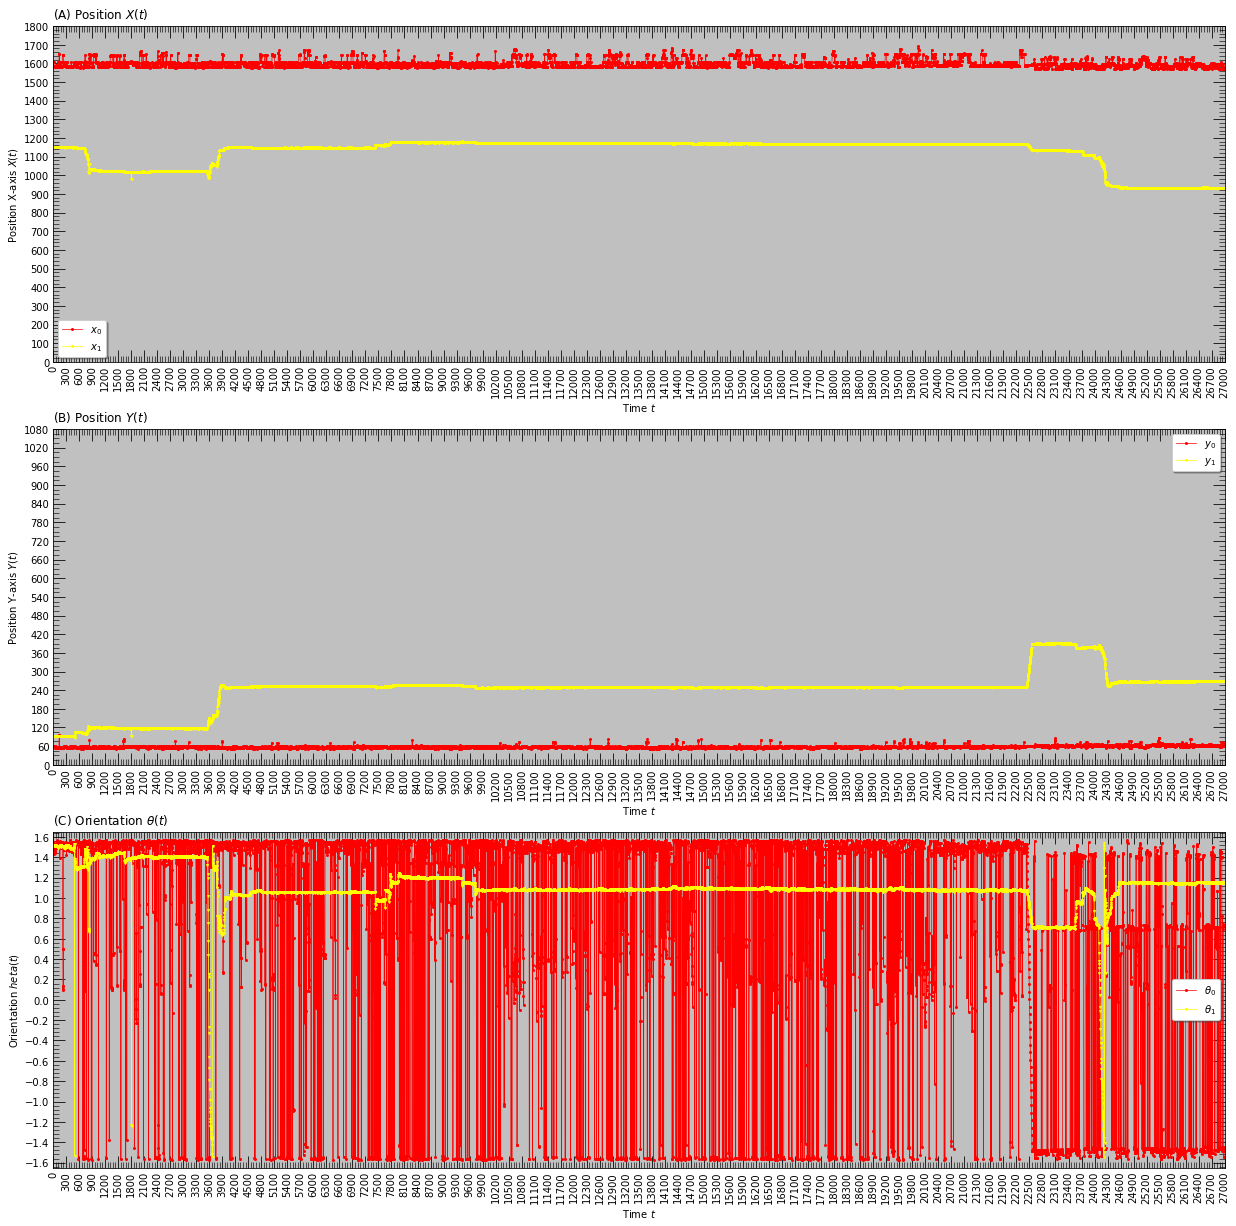

Corrected Orientation


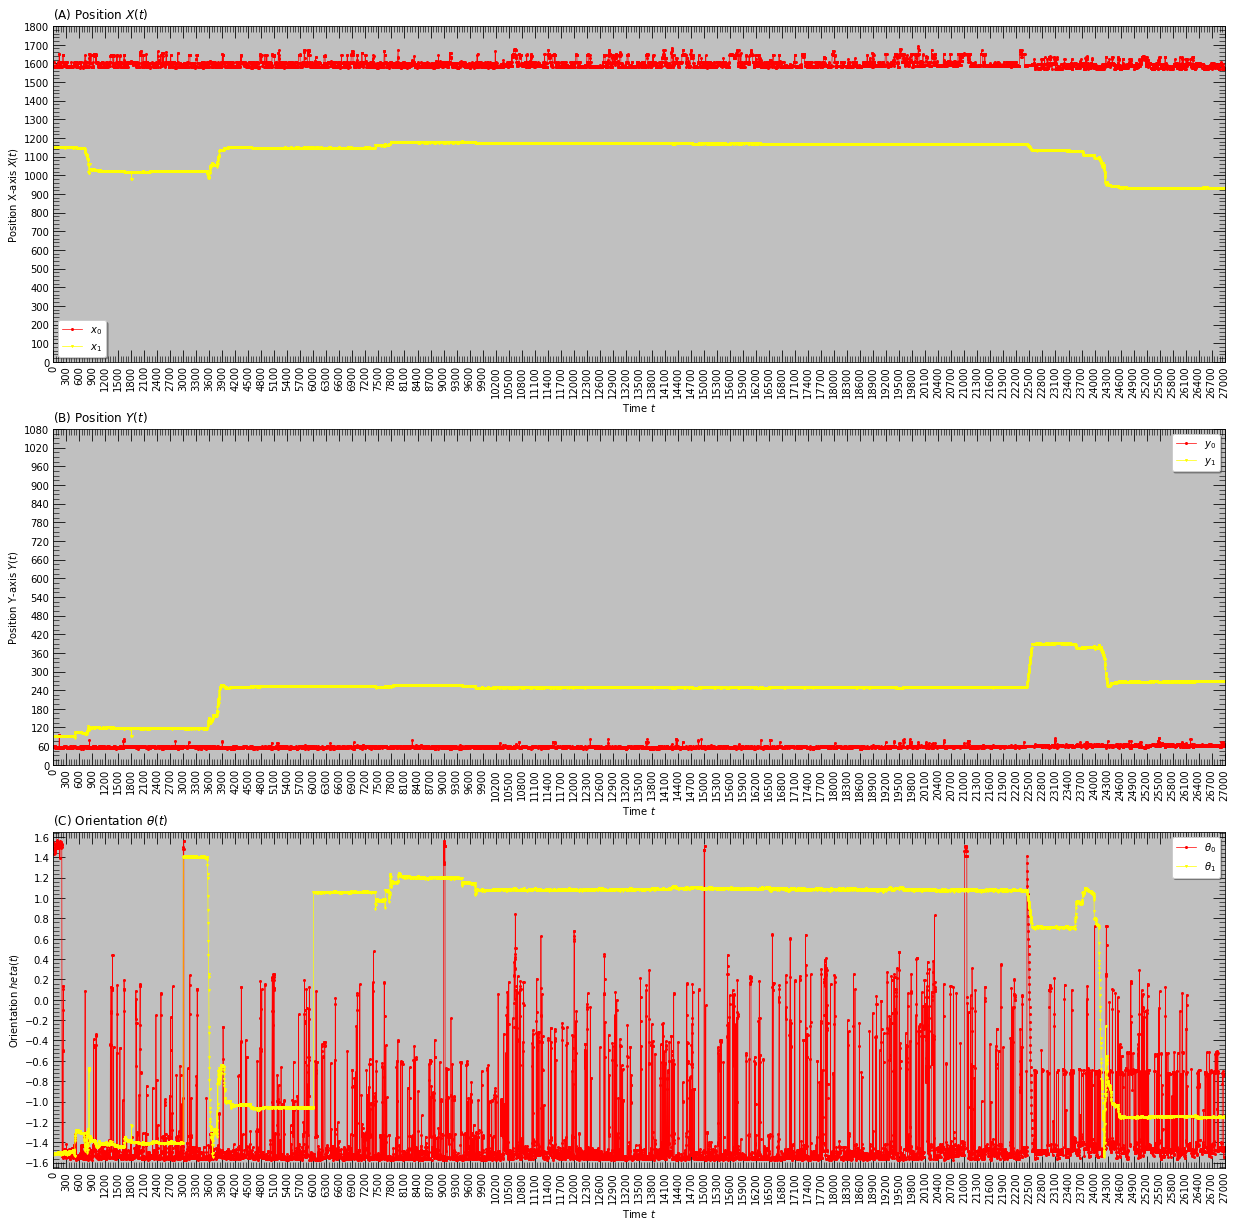

In [66]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf   = 0, 27000  # 22200, 24300
    t0_, tf_ = 0, 27000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1800], [0, 1080], [-1.65, 1.65]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9701) # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

In [67]:
df_smooth = df_full.copy()
df_smooth["id"] = df_smooth["permuted_id"]
df_smooth[((df_smooth["time"] >= 22240) & (df_smooth["time"] <= 22800))].sort_values(["permuted_id", "time"])

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
14828,True,22242,chunk_21000_22440,0,0,1584.730393,57.004886,1587.054013,58.052633,0.0,1584.730393,57.004886,0.264272,1584.730393,57.004886,1.567320,-1.567320,7778.0,195.130868,92.970154,0.879201,2,3.0,-0.514927,-0.106323,7.268278e-03,False,False,False
14830,True,22245,chunk_21000_22440,0,0,1585.083461,57.103911,1587.576435,58.455483,0.0,1585.083461,57.103911,0.263543,1585.083461,57.103911,1.568989,-1.568989,7824.0,195.108890,93.820672,0.876796,2,3.0,0.117689,0.033008,5.563209e-04,False,False,False
14832,True,22248,chunk_21000_22440,0,0,1587.205406,57.156573,1590.635287,58.760736,0.0,1587.205406,57.156573,0.262815,1587.205406,57.156573,1.529065,-1.529065,7843.0,201.212328,94.130292,0.883826,2,3.0,0.707315,0.017554,-1.330770e-02,False,False,False
14834,True,22251,chunk_21000_22440,0,0,1585.431135,57.312231,1588.193018,58.787151,0.0,1585.431135,57.312231,0.262086,1585.431135,57.312231,1.562345,-1.562345,7914.0,195.068297,93.764358,0.876899,2,3.0,-0.591424,0.051886,1.109315e-02,False,False,False
14836,True,22254,chunk_21000_22440,0,0,1584.005670,55.342514,1586.516604,56.504380,0.0,1584.005670,55.342514,0.261357,1584.005670,55.342514,-1.567334,-1.567334,7407.0,199.695615,89.708579,0.893418,2,3.0,-0.475155,-0.656573,-1.662887e-03,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15193,True,22788,chunk_22560_24000,1,1,1134.015731,389.934427,1137.402214,406.588753,0.0,1134.015731,389.934427,0.382013,1134.015731,389.934427,0.714166,0.714166,17736.0,218.916278,118.494016,0.840845,2,3.0,-0.103905,0.069709,1.839441e-03,False,False,False
15195,True,22791,chunk_22560_24000,1,1,1134.037388,389.958270,1137.459021,406.642687,0.0,1134.037388,389.958270,0.382963,1134.037388,389.958270,0.714165,0.714165,17733.0,218.944340,118.513090,0.840834,2,3.0,0.007219,0.007948,-3.348849e-07,False,False,False
15197,True,22794,chunk_22560_24000,1,1,1134.032732,390.069006,1137.375091,406.808811,0.0,1134.032732,390.069006,0.383913,1134.032732,390.069006,0.714126,0.714126,17781.0,218.936465,118.861607,0.839794,2,3.0,-0.001552,0.036912,-1.317744e-05,False,False,False
15199,True,22797,chunk_22560_24000,1,1,1134.027964,389.990416,1137.406725,406.701231,0.0,1134.027964,389.990416,0.384863,1134.027964,389.990416,0.714822,0.714822,17737.0,218.956696,118.669448,0.840393,2,3.0,-0.001589,-0.026197,2.320413e-04,False,False,False


## Setting video information

In [68]:
# # Load the video
# reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# # Check the number of frames
# num_frames = reader.count_frames()
# print("Total frames: {}".format(num_frames))

# # Extract a frame to inspect the content
# time = 0
# frame = reader.get_data(time)
# print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

Total frames: 27019
Frames resolution: 1080 x 1920


## Comparative of process

In [69]:
# # Original frame
# time = 209  #271  # 209  # 80
# times = [time - 1, time, time + 1]
# reinforce_boundaries = True
# remove_holes = False
# type = "local equalized"
# clip_limit = 0.05
# threshold = 0.19
# sigma = 1.5
# x_bounds = x_bounds  # [40, 1020]
# y_bounds = y_bounds  # [160, 1740]
# region_area_min = 200
# axis_major_min = 94
# eccentricity_max = 0.99


# df_tracked_frame_0 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[0], reader.get_data(times[0])]
# )

# df_tracked_frame_1 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[1], reader.get_data(times[1])]
# )

# df_tracked_frame_2 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[2], reader.get_data(times[2])]
# )

# df_tracked_old = pd.concat([df_tracked_frame_0, df_tracked_frame_1, df_tracked_frame_2], ignore_index=True)

# width = 10
# n_x_breaks = 20
# n_y_breaks = 20
# fancy_legend = True
# x_legend = 1.001
# y_legend = 0.891

# df_smooth = df_full.copy()
# df_smooth["id"] = df_smooth["permuted_id"]
# df_smooth["orientation"] = df_smooth["corrected_orientation"]

# fig = plt_sp.plot_all_process_frame(
#     reader=reader,
#     times=times,
#     df_tracked=df_tracked_old,
#     df_clustered=df_tracked,
#     df_smoothed=df_smooth,
#     width=width,
#     n_x_breaks=n_x_breaks,
#     n_y_breaks=n_y_breaks,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     fancy_legend=fancy_legend,
#     x_legend=x_legend,
#     y_legend=y_legend
# )